# Bycicle Renting Data Exploration
## by Sunny

## Preliminary Wrangling
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
1. combining bycicle renting data in 2019
2. 

The original data is downloaded from https://www.fordgobike.com/system-data by month, I conbined the monthly data in 2019 to form a whole dataset outside this notebook. The combined 2019 dataset includes 2506983 entries with 15 features ['bike_id', 'bike_share_for_all_trip', 'duration_sec', 'end_station_id',
       'end_station_latitude', 'end_station_longitude', 'end_station_name',
       'end_time', 'rental_access_method', 'start_station_id',
       'start_station_latitude', 'start_station_longitude',
       'start_station_name', 'start_time', 'user_type'].
I would like to mainly investigate:
1. how long the avg trip takes?
2. What is the user segment distribution?
3. When are the most trips take place in terms of time of day?day of the week, and month of the year?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# load in the dataset into a pandas dataframe, print statistics
# the rental data in 2019 has been combined in to file combined_csv
df = pd.read_csv('combined_csv.csv')

C:\Users\miaos1\Anaconda3\envs\py3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(2506983, 15)
bike_id                      int64
bike_share_for_all_trip     object
duration_sec                 int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name            object
end_time                    object
rental_access_method        object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name          object
start_time                  object
user_type                   object
dtype: object
   bike_id bike_share_for_all_trip  duration_sec  end_station_id  \
0     4861                      No         80825           196.0   
1     5506                      No         65900           134.0   
2     2717                      No         62633           157.0   
3     4557                      No         44680            53.0   
4     2100                      No         60709            28.0   
5     3532                      No     

In [4]:
df.head()

bike_id bike_share_for_all_trip  duration_sec  end_station_id  \
0     4861                      No         80825           196.0   
1     5506                      No         65900           134.0   
2     2717                      No         62633           157.0   
3     4557                      No         44680            53.0   
4     2100                      No         60709            28.0   

   end_station_latitude  end_station_longitude              end_station_name  \
0             37.808894            -122.256460       Grand Ave at Perkins St   
1             37.752428            -122.420628        Valencia St at 24th St   
2             37.846784            -122.291376          65th St at Hollis St   
3             37.775946            -122.437777        Grove St at Divisadero   
4             37.787168            -122.388098  The Embarcadero at Bryant St   

                   end_time rental_access_method  start_station_id  \
0  2019-02-01 16:24:49.8640                  NaN             229.0   
1  2019-02-01 15:16:54.1730                  NaN               4.0   
2  2019-02-01 11:30:46.5300                  NaN             245.0   
3  2019-02-01 08:10:50.3180                  NaN              85.0   
4  2019-02-01 07:10:51.0650                  NaN              16.0   

   start_station_latitude  start_station_longitude  \
0               37.775745              -122.213037   
1               37.785881              -122.408915   
2               37.870139              -122.268422   
3               37.770083              -122.429156   
4               37.794130              -122.394430   

            start_station_name                start_time   user_type  
0    Foothill Blvd at 42nd Ave  2019-01-31 17:57:44.6130  Subscriber  
1  Cyril Magnin St at Ellis St  2019-01-31 20:58:33.8860  Subscriber  
2       Downtown Berkeley BART  2019-01-31 18:06:52.9240    Customer  
3      Church St at Duboce Ave  2019-01-31 19:46:09.7190    Customer  
4      Steuart St at Market St  2019-01-31 14:19:01.5410    Customer

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [6]:
df.columns

Index(['bike_id', 'bike_share_for_all_trip', 'duration_sec', 'end_station_id',
       'end_station_latitude', 'end_station_longitude', 'end_station_name',
       'end_time', 'rental_access_method', 'start_station_id',
       'start_station_latitude', 'start_station_longitude',
       'start_station_name', 'start_time', 'user_type'],
      dtype='object')

In [7]:
df.rental_access_method.unique()

array([nan, 'app', 'clipper'], dtype=object)

In [8]:
df.rental_access_method.isnull().sum()

2386145

In [9]:
# copy the usable columns to df1
df1 = df[['bike_id','duration_sec','start_time','end_time','user_type','rental_access_method' ]]

In [11]:
# transfer the start and end time into datetime type
df1['start_time'] = pd.to_datetime(df1['start_time'] )
df1['end_time'] = pd.to_datetime(df1['end_time'] )

C:\Users\miaos1\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\miaos1\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
# processed data set df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 6 columns):
bike_id                 int64
duration_sec            int64
start_time              datetime64[ns]
end_time                datetime64[ns]
user_type               object
rental_access_method    object
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 114.8+ MB


In [13]:

df1.head()

bike_id  duration_sec              start_time                end_time  \
0     4861         80825 2019-01-31 17:57:44.613 2019-02-01 16:24:49.864   
1     5506         65900 2019-01-31 20:58:33.886 2019-02-01 15:16:54.173   
2     2717         62633 2019-01-31 18:06:52.924 2019-02-01 11:30:46.530   
3     4557         44680 2019-01-31 19:46:09.719 2019-02-01 08:10:50.318   
4     2100         60709 2019-01-31 14:19:01.541 2019-02-01 07:10:51.065   

    user_type rental_access_method  
0  Subscriber                  NaN  
1  Subscriber                  NaN  
2    Customer                  NaN  
3    Customer                  NaN  
4    Customer                  NaN

### What is the structure of your dataset?

> There is 2506983 entries in this dataset with 15 features (['bike_id', 'bike_share_for_all_trip', 'duration_sec', 'end_station_id',
       'end_station_latitude', 'end_station_longitude', 'end_station_name',
       'end_time', 'rental_access_method', 'start_station_id',
       'start_station_latitude', 'start_station_longitude',
       'start_station_name', 'start_time', 'user_type'])
  

### What is/are the main feature(s) of interest in your dataset?

> The main features I would be investigating are 'bike_id','duration_sec','start_time','end_time','user_type'.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 'bike_id','rental_access_method' might support my investigation.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [14]:
# clean missing data rows
df1.isnull().sum()

bike_id                       0
duration_sec                  0
start_time                    0
end_time                      0
user_type                     0
rental_access_method    2386145
dtype: int64

In [15]:
# clean the duplicated data row
df1.duplicated().sum()

0

In [16]:
# investigate the 'rental_access_method', which has 2386145 null data row, it might not be able to support the investigation
df1[df1['rental_access_method'] == 'clipper']

bike_id  duration_sec          start_time            end_time  \
1241023   289022          1813 2019-06-24 14:47:31 2019-06-24 15:17:44   
1241062   448234         11406 2019-06-20 18:59:20 2019-06-20 22:09:26   
1241133   455816           980 2019-06-24 08:53:16 2019-06-24 09:09:37   
1241135   357210           519 2019-06-21 08:12:20 2019-06-21 08:20:59   
1241143   773766           486 2019-06-26 08:07:41 2019-06-26 08:15:48   
1241186   342725           849 2019-06-19 13:15:10 2019-06-19 13:29:19   
1241201   295032          1516 2019-06-20 20:46:14 2019-06-20 21:11:30   
1241213   447950          1191 2019-06-22 13:25:42 2019-06-22 13:45:34   
1241215   326416           187 2019-06-19 07:38:49 2019-06-19 07:41:57   
1241216   341794           690 2019-06-19 19:05:34 2019-06-19 19:17:04   
1241218   499829          1142 2019-06-20 17:26:39 2019-06-20 17:45:41   
1241221   413368           802 2019-06-12 18:14:39 2019-06-12 18:28:01   
1241315   404592           787 2019-06-22 21:29:54 2019-06-22 21:43:01   
1241323   289306           816 2019-06-22 21:29:36 2019-06-22 21:43:13   
1241335   326416           438 2019-06-22 21:25:42 2019-06-22 21:33:01   
1241351   341794           115 2019-06-19 18:29:25 2019-06-19 18:31:20   
1241430   651526           467 2019-06-21 19:52:12 2019-06-21 19:59:59   
1241449   551846           982 2019-06-26 17:51:16 2019-06-26 18:07:38   
1241451   349374           347 2019-06-25 08:03:27 2019-06-25 08:09:14   
1241606   551846           270 2019-06-26 08:21:41 2019-06-26 08:26:11   
1241651   363691           284 2019-06-23 15:52:49 2019-06-23 15:57:34   
1241665   591433           523 2019-06-27 09:37:30 2019-06-27 09:46:13   
1241669   423712           452 2019-06-24 09:39:28 2019-06-24 09:47:00   
1241691   597477          1282 2019-06-20 20:23:47 2019-06-20 20:45:09   
1241692   184011           270 2019-06-19 19:21:05 2019-06-19 19:25:36   
1241697   302738           494 2019-06-23 12:53:02 2019-06-23 13:01:16   
1241700   241756           404 2019-06-19 13:05:20 2019-06-19 13:12:04   
1241710   589794           251 2019-06-15 12:13:19 2019-06-15 12:17:30   
1241724   334692           404 2019-06-27 01:24:07 2019-06-27 01:30:52   
1241726   252053           506 2019-06-25 09:35:26 2019-06-25 09:43:52   
...          ...           ...                 ...                 ...   
2506446   506921           506 2019-12-28 15:50:58 2019-12-28 15:59:25   
2506454   339086           428 2019-12-31 12:04:02 2019-12-31 12:11:11   
2506469   517726           365 2019-12-23 17:34:34 2019-12-23 17:40:39   
2506477   239141           884 2019-12-27 22:55:06 2019-12-27 23:09:51   
2506499   658889           260 2019-12-23 11:35:21 2019-12-23 11:39:41   
2506551   706290           126 2019-12-19 14:05:25 2019-12-19 14:07:31   
2506564   674211           164 2019-12-21 00:04:53 2019-12-21 00:07:38   
2506567   349228          1515 2019-12-19 19:02:47 2019-12-19 19:28:03   
2506587   812844           627 2019-12-30 15:29:54 2019-12-30 15:40:21   
2506598   239141           333 2019-12-27 23:41:40 2019-12-27 23:47:13   
2506605   238979          1131 2019-12-24 15:06:09 2019-12-24 15:25:00   
2506676   949430          1955 2019-12-25 17:02:22 2019-12-25 17:34:58   
2506685   705938           405 2019-12-20 22:39:32 2019-12-20 22:46:18   
2506689   883574           449 2019-12-31 15:32:13 2019-12-31 15:39:43   
2506711   708909          2357 2019-12-22 10:34:23 2019-12-22 11:13:40   
2506717   666749           295 2019-12-19 15:47:04 2019-12-19 15:51:59   
2506725   252905          1616 2019-12-25 12:29:26 2019-12-25 12:56:23   
2506733   316681          2410 2019-12-24 12:27:58 2019-12-24 13:08:08   
2506734   315743           887 2019-12-22 20:51:32 2019-12-22 21:06:19   
2506798   357938          1130 2019-12-27 09:33:04 2019-12-27 09:51:55   
2506800   658889           218 2019-12-23 11:41:06 2019-12-23 11:44:45   
2506816   949430           207 2019-12-25 15:00:35 2019-12-25 15:04:03   
2506836   771

In [17]:
df1[df1['rental_access_method'] == 'app']

bike_id  duration_sec          start_time            end_time  \
1240946   773766           511 2019-06-20 19:08:25 2019-06-20 19:16:57   
1240947   630873           592 2019-06-21 13:44:35 2019-06-21 13:54:27   
1240948   205087          1648 2019-06-20 21:21:27 2019-06-20 21:48:55   
1240949   189672          1074 2019-06-25 11:31:45 2019-06-25 11:49:39   
1240950   455816          1646 2019-06-21 15:23:48 2019-06-21 15:51:15   
1240951   651526          2448 2019-06-24 15:17:52 2019-06-24 15:58:40   
1240952   241756          3432 2019-06-16 15:33:40 2019-06-16 16:30:53   
1240953   205087           316 2019-06-20 20:51:45 2019-06-20 20:57:01   
1240954   773766          3054 2019-06-21 10:31:31 2019-06-21 11:22:26   
1240955   773766           207 2019-06-21 05:33:37 2019-06-21 05:37:05   
1240956   573816           604 2019-06-21 10:42:36 2019-06-21 10:52:40   
1240957   773766           950 2019-06-20 21:17:12 2019-06-20 21:33:03   
1240958   773766           494 2019-06-20 18:34:02 2019-06-20 18:42:17   
1240959   773766           723 2019-06-20 20:33:29 2019-06-20 20:45:32   
1240960   773766           436 2019-06-20 22:26:20 2019-06-20 22:33:36   
1240961   161727          1327 2019-06-24 14:32:30 2019-06-24 14:54:38   
1240962   379136          1455 2019-06-25 13:21:07 2019-06-25 13:45:22   
1240963   363691          1452 2019-06-22 10:42:51 2019-06-22 11:07:03   
1240964   437626          3601 2019-06-26 13:57:59 2019-06-26 14:58:01   
1240965   573816          1922 2019-06-21 19:21:26 2019-06-21 19:53:28   
1240966   600526           346 2019-06-12 20:26:40 2019-06-12 20:32:26   
1240967   161727           414 2019-06-20 15:02:21 2019-06-20 15:09:16   
1240968   342725           425 2019-06-19 11:37:50 2019-06-19 11:44:56   
1240969   372408           873 2019-06-18 08:57:54 2019-06-18 09:12:27   
1240970   600526          1140 2019-06-13 22:38:19 2019-06-13 22:57:19   
1240971   161727          1163 2019-06-24 20:49:48 2019-06-24 21:09:12   
1240972   344794           364 2019-06-19 19:24:35 2019-06-19 19:30:40   
1240973   600526           155 2019-06-12 20:50:27 2019-06-12 20:53:03   
1240974   161727          3902 2019-06-24 21:34:04 2019-06-24 22:39:07   
1240975   491076          1082 2019-06-24 05:56:27 2019-06-24 06:14:29   
...          ...           ...                 ...                 ...   
2506951   421934          1176 2019-12-27 16:53:01 2019-12-27 17:12:38   
2506952   167109          4404 2019-12-24 16:22:05 2019-12-24 17:35:30   
2506953   439870          1008 2019-12-25 16:22:18 2019-12-25 16:39:07   
2506954   120153          2941 2019-12-28 12:10:34 2019-12-28 12:59:35   
2506955   607037          4390 2019-12-24 16:21:10 2019-12-24 17:34:21   
2506956   364715          1771 2019-12-30 16:12:30 2019-12-30 16:42:01   
2506957   156185          1060 2019-12-29 12:23:17 2019-12-29 12:40:57   
2506958   396408           986 2019-12-27 19:26:46 2019-12-27 19:43:12   
2506959   305737          2067 2019-12-28 16:45:02 2019-12-28 17:19:30   
2506960   310835          1063 2019-12-29 12:23:25 2019-12-29 12:41:08   
2506962   539789          1403 2019-12-31 15:12:27 2019-12-31 15:35:51   
2506964   708909          1662 2019-12-22 17:28:06 2019-12-22 17:55:49   
2506965   226031           507 2019-12-24 16:32:01 2019-12-24 16:40:29   
2506966   396408          3518 2019-12-27 12:54:37 2019-12-27 13:53:15   
2506967   396408           132 2019-12-27 12:09:16 2019-12-27 12:11:28   
2506968   309975          3419 2019-12-27 12:56:34 2019-12-27 13:53:34   
2506969   787584           266 2019-12-31 23:05:58 2019-12-31 23:10:24   
2506970   499815           233 2019-12-31 09:42:39 2019-12-31 09:46:32   
2506971   368240          1541 2019-12-26 11:04:05 2019-12-26 11:29:47   
2506972   344716          1497 2019-12-26 11:04:13 2019-12-26 11:29:10   
2506973   551068          2336 2019-12-28 14:49:19 2019-12-28 15:28:15   
2506974   593917          2297 2019-12-28 14:49:17 2019-12-28 15:27:34   
2506975   326

In [18]:
# duration in minite unit
df1['duration_min'] = round(df1['duration_sec']/60)

C:\Users\miaos1\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
# create a weekday flag column
df1['weekday'] = df1.start_time.dt.weekday

C:\Users\miaos1\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### rental start time

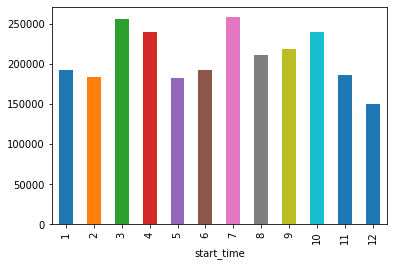

In [20]:
# No obvious trend in months data. march, april, july, oct shows more user.
df1["start_time"].groupby(df1["start_time"].dt.month).count().plot(kind="bar")

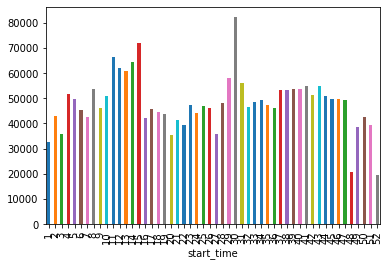

In [21]:
# less usage during Dec
df1["start_time"].groupby(df1["start_time"].dt.week).count().plot(kind="bar")

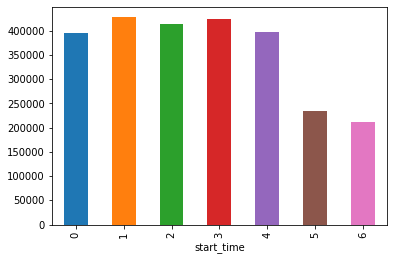

In [22]:
#Return the day of the week as an integer, where Monday is 0 and Sunday is 6. workday has more user than weekend 
df1["start_time"].groupby(df1["start_time"].dt.weekday).count().plot(kind="bar")

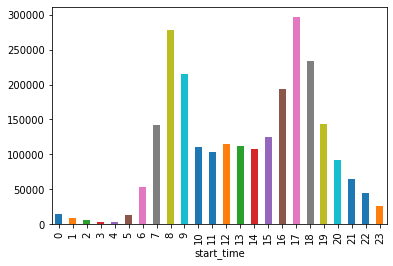

In [23]:
# peak hour is around 8-9 and 17-18
df1["start_time"].groupby(df1["start_time"].dt.hour).count().plot(kind="bar")

>For the rental count data, we can see in the above figures, the count in the peak hour 7-9, 16-18 is much higher than other time of day; weekday also shows higher rental count than weekend; there is not obvious trend in the monthly distribution. 
I would like to further investigate, whether the different seasons post impact on the rental count. 

### duration

(0.0, 60.0)

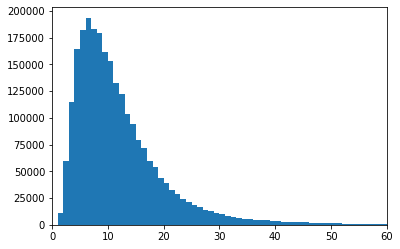

In [24]:
# duration distribution
bin_edges = np.arange(0, df1['duration_min'].max()+1, 1 )
plt.hist(data = df1, x= 'duration_min', bins = bin_edges)
plt.xlim(0, 60)

In [25]:
# we noted the longest duration is 9*e+5, which is 253h, which is incorrect
df1.describe()

bike_id  duration_sec  duration_min       weekday
count  2.506983e+06  2.506983e+06  2.506983e+06  2.506983e+06
mean   2.789833e+04  8.076483e+02  1.346051e+01  2.618593e+00
std    1.146067e+05  1.974714e+03  3.291319e+01  1.849335e+00
min    4.000000e+00  6.000000e+01  1.000000e+00  0.000000e+00
25%    1.952000e+03  3.590000e+02  6.000000e+00  1.000000e+00
50%    4.420000e+03  5.710000e+02  1.000000e+01  3.000000e+00
75%    9.682000e+03  8.870000e+02  1.500000e+01  4.000000e+00
max    9.999410e+05  9.121100e+05  1.520200e+04  6.000000e+00

In [26]:
# exclude the outlier of duration_min
iqr = 1.500000e+01-6.000000e+00
lower_bound = 6.000000e+00 - iqr*1.5
upper_bound = 1.500000e+01 +iqr * 1.5
upper_bound= 3*24*60 # upper bound set as 3 consecutive day
lower_bound = 0

In [27]:
df1 = df1[(df1["duration_min"]<upper_bound) & (df1["duration_min"]> lower_bound)]

(0.0, 30.0)

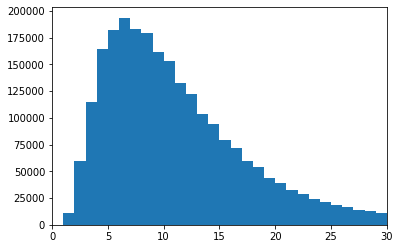

In [28]:
bin_edges = np.arange(0, df1['duration_min'].max()+1, 1 )
plt.hist(data = df1, x= 'duration_min', bins = bin_edges)
plt.xlim(0,30)

> the duration data is right skewed

In [29]:
df1.describe()

bike_id  duration_sec  duration_min       weekday
count  2.506982e+06  2.506982e+06  2.506982e+06  2.506982e+06
mean   2.789809e+04  8.072848e+02  1.345445e+01  2.618593e+00
std    1.146061e+05  1.888977e+03  3.148426e+01  1.849336e+00
min    4.000000e+00  6.000000e+01  1.000000e+00  0.000000e+00
25%    1.952000e+03  3.590000e+02  6.000000e+00  1.000000e+00
50%    4.420000e+03  5.710000e+02  1.000000e+01  3.000000e+00
75%    9.682000e+03  8.870000e+02  1.500000e+01  4.000000e+00
max    9.999410e+05  8.623000e+04  1.437000e+03  6.000000e+00

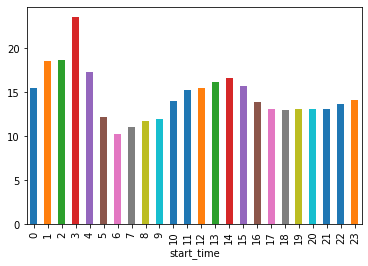

In [30]:
# the highest avg duration of renting bicycle is at 4 am.
df1["duration_min"].groupby(df1["start_time"].dt.hour).mean().plot(kind="bar")

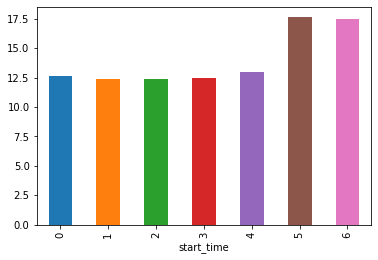

In [31]:
# weekends have higher avg trip duration than working day
df1["duration_min"].groupby(df1["start_time"].dt.weekday).mean().plot(kind="bar")

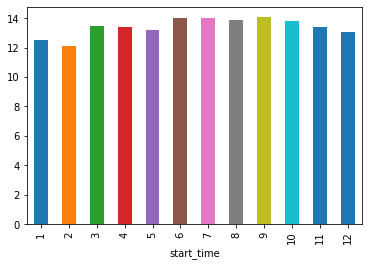

In [32]:
# No obvious trend in months data.
df1["duration_min"].groupby(df1["start_time"].dt.month).mean().plot(kind="bar")

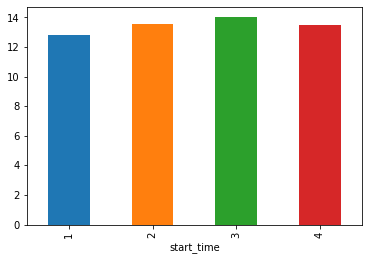

In [33]:
# the highest avg duration of renting bicycle is at 4 am.
df1["duration_min"].groupby(df1["start_time"].dt.quarter).mean().plot(kind="bar")

>For the duration data, we can see in the above figures, the renting duration in the peak hour 7-9, 16-18 is much higher than other time of day; weekday also shows higher renting duration than weekend; there is not obvious trend in the monthly distribution. 
I would like to further investigate, whether the different seasons post impact on the renting duration. 

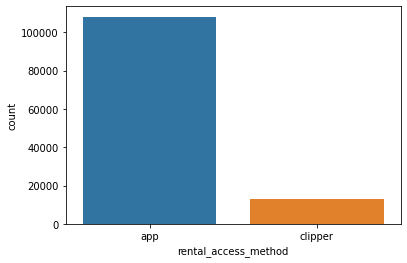

In [34]:
# more people tend to use app rather than clipper card
sb.countplot(data = df1, x = 'rental_access_method')

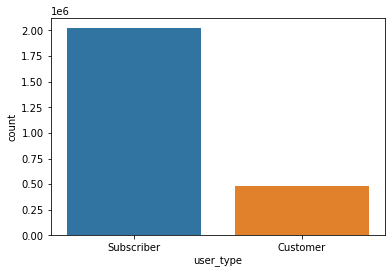

In [35]:
# On the user segment plot, we can easily see the subscribers user count is almost fourfold of the customer segment.
sb.countplot(data = df1, x = 'user_type')

In [36]:
df1.user_type.isnull().sum()

0

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> 1. investigate the 'rental_access_method', which has 2386145 null data row, so it might not be able to support the investigation. As we can see in the above bar plot, more people tend to use app rather than clipper card.
> 2. the duration is in second unit, i transfer it into minite unit for the ease of analysis. 
> 3. I also removed the outliers in the duration data, as I found a very large usage over 400h. I was planing to use IQR to determine the outlier boundary, but after i had a closer look at the data, I found many weekend user take longer trip or renting longer time even for a day or two. So I manually set the outlier boundary at [0,3days]
> 4. I create a weekday flag column for the ease of analysis.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> 1. The original data is saved by month, I conbined the monthly data in 2019 to form a whole dataset outside this notebook. 
> 2. I found the duration distribution is right skewed.
> 3. I only taked the features might be useful for me to analyse the trip duration and usage over time. ('bike_id','duration_sec','start_time','end_time','user_type','rental_access_method' )

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

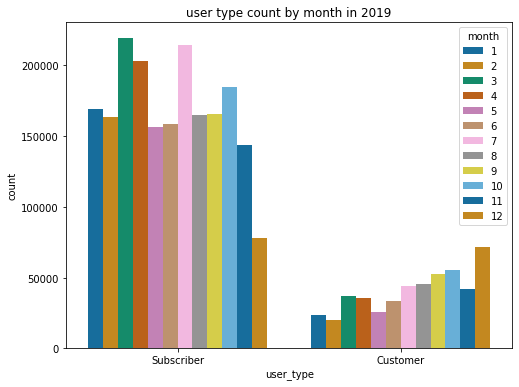

In [37]:
# user type count by month in 2019
plt.figure(figsize = [8, 6])

sb.countplot(data = df1, x = 'user_type', hue = df1["start_time"].dt.month, palette = "colorblind")
plt.title('user type count by month in 2019')
plt.legend(title='month', loc = 'upper right')

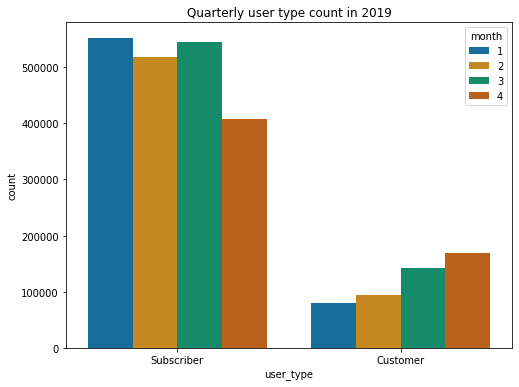

In [38]:
# user type count by month in 2019
plt.figure(figsize = [8, 6])

sb.countplot(data = df1, x = 'user_type', hue = df1["start_time"].dt.quarter, palette = "colorblind")
plt.title('Quarterly user type count in 2019')
plt.legend(title='month', loc = 'upper right')

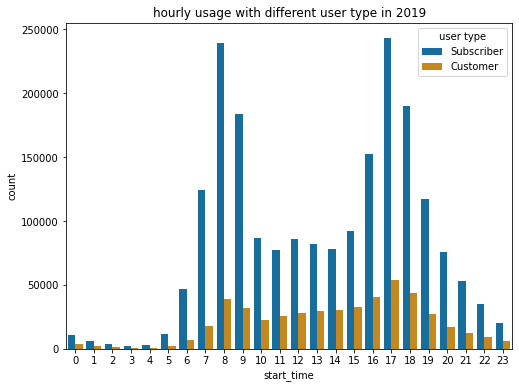

In [60]:
# hourly usage shows less customer usage during night time, the peak usage occurs during commuting peak hour 7-9 am, 4-6 pm.
plt.figure(figsize = [8, 6])

sb.countplot(data = df1, x = df1["start_time"].dt.hour, hue ='user_type' , palette = "colorblind")
plt.title('hourly usage with different user type in 2019')
plt.legend(title='user type', loc = 'upper right')

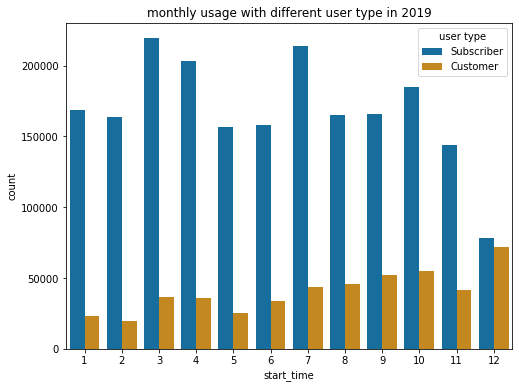

In [39]:
#monthly usage with different user type in 2019, I noticed the number of subscribers and customers in dec are almost same, while in other months, the number of subscribers are many more than customer's number.   
plt.figure(figsize = [8, 6])

sb.countplot(data = df1, x = df1["start_time"].dt.month, hue ='user_type' , palette = "colorblind")
plt.title('monthly usage with different user type in 2019')
plt.legend(title='user type', loc = 'upper right')

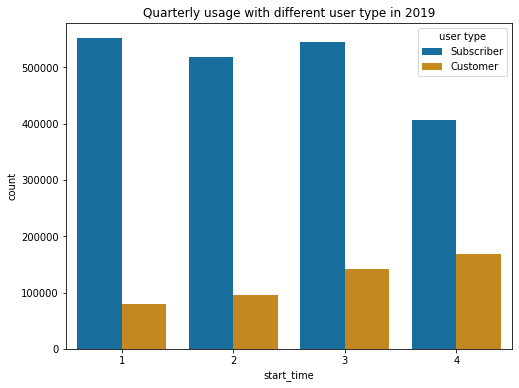

In [40]:
#monthly usage with different user type in 2019, I noticed the number of subscribers and customers in dec are almost same, while in other months, the number of subscribers are many more than customer's number.   
plt.figure(figsize = [8, 6])

sb.countplot(data = df1, x = df1["start_time"].dt.quarter, hue ='user_type' , palette = "colorblind")
plt.title('Quarterly usage with different user type in 2019')
plt.legend(title='user type', loc = 'upper right')

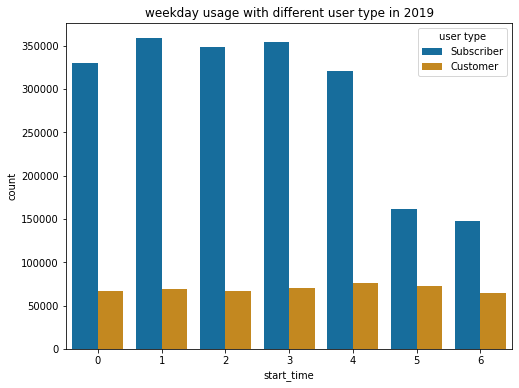

In [41]:
# On weekday usage with different user type in 2019 figure, we can see less total trips count in weekends than workdays. We can also find the customer segment usage in  workdays and weekends are almost same, while subscriber tend to take more trips during workdays. 
plt.figure(figsize = [8, 6])

sb.countplot(data = df1, x = df1["start_time"].dt.weekday, hue ='user_type' , palette = "colorblind")
plt.title('weekday usage with different user type in 2019')
plt.legend(title='user type', loc = 'upper right')

Text(0.5, 1.0, 'Average trip duration for different user type in 2019')

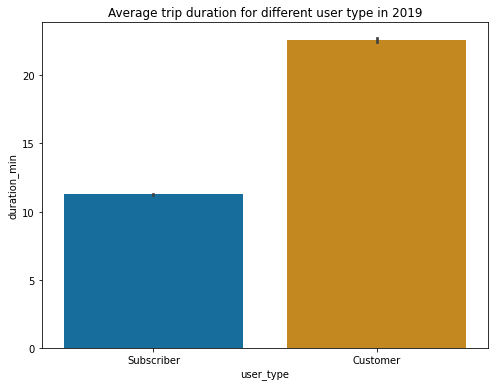

In [42]:
# customers tend to take longer trip than the subscribers.
plt.figure(figsize = [8, 6])

sb.barplot(data = df1, y = "duration_min" , x = 'user_type', palette = "colorblind")
plt.title('Average trip duration for different user type in 2019')


In [43]:
df1

bike_id  duration_sec              start_time  \
0           4861         80825 2019-01-31 17:57:44.613   
1           5506         65900 2019-01-31 20:58:33.886   
2           2717         62633 2019-01-31 18:06:52.924   
3           4557         44680 2019-01-31 19:46:09.719   
4           2100         60709 2019-01-31 14:19:01.541   
5           3532          6733 2019-01-31 22:35:50.813   
6           5114          1188 2019-01-31 23:54:38.901   
7           3967          1254 2019-01-31 23:48:50.092   
8           4813          3153 2019-01-31 23:17:05.462   
9           1976           323 2019-01-31 23:59:47.568   
10          3826          2316 2019-01-31 23:25:59.866   
11          4642           433 2019-01-31 23:57:04.381   
12           263           272 2019-01-31 23:59:44.880   
13          3035           547 2019-01-31 23:51:54.232   
14          3886          4310 2019-01-31 22:48:47.518   
15          5019           559 2019-01-31 23:51:17.407   
16          3842           451 2019-01-31 23:52:50.137   
17          5480           731 2019-01-31 23:46:39.438   
18          4960           480 2019-01-31 23:48:58.583   
19          5257           252 2019-01-31 23:52:29.407   
20          3649           376 2019-01-31 23:49:32.777   
21          5382           340 2019-01-31 23:49:27.061   
22          5193          1485 2019-01-31 23:29:49.689   
23           198           424 2019-01-31 23:47:30.211   
24          5265           851 2019-01-31 23:40:06.474   
25          5354           836 2019-01-31 23:40:20.817   
26          4533           480 2019-01-31 23:44:30.627   
27          5309           538 2019-01-31 23:42:28.695   
28          5122           342 2019-01-31 23:45:06.345   
29          4542           678 2019-01-31 23:39:27.119   
...          ...           ...                     ...   
2506953   439870          1008 2019-12-25 16:22:18.000   
2506954   120153          2941 2019-12-28 12:10:34.000   
2506955   607037          4390 2019-12-24 16:21:10.000   
2506956   364715          1771 2019-12-30 16:12:30.000   
2506957   156185          1060 2019-12-29 12:23:17.000   
2506958   396408           986 2019-12-27 19:26:46.000   
2506959   305737          2067 2019-12-28 16:45:02.000   
2506960   310835          1063 2019-12-29 12:23:25.000   
2506961   551068           975 2019-12-27 19:26:30.000   
2506962   539789          1403 2019-12-31 15:12:27.000   
2506963   650348          1003 2019-12-27 19:26:39.000   
2506964   708909          1662 2019-12-22 17:28:06.000   
2506965   226031           507 2019-12-24 16:32:01.000   
2506966   396408          3518 2019-12-27 12:54:37.000   
2506967   396408           132 2019-12-27 12:09:16.000   
2506968   309975          3419 2019-12-27 12:56:34.000   
2506969   787584           266 2019-12-31 23:05:58.000   
2506970   499815           233 2019-12-31 09:42:39.000   
2506971   368240          1541 2019-12-26 11:04:05.000   
2506972   344716          1497 2019-12-26 11:04:13.000   
2506973   551068          2336 2019-12-28 14:49:19.000   
2506974   593917          2297 2019-12-28 14:49:17.000   
2506975   326273          1816 2019-12-27 17:58:23.000   
2506976   607037           687 2019-12-24 18:21:20.000   
2506977   167109           711 2019-12-24 18:21:41.000   
2506978   719651           731 2019-12-28 18:37:29.000   
2506979   655411           748 2019-12-28 18:37:24.000   
2506980   936881          1044 2019-12-26 14:25:37.000   
2506981   397539           326 2019-12-30 20:35:43.000   
2506982   662304          4023 2019-12-31 19:26:48.000   

                       end_time   user_type rental_access_method  \
0       2019-02-01 16:24:49.864  Subscriber                  NaN   
1       2019-02-01 15:16:54.173  Subscriber                  NaN   
2       2019-02-01 11:30:46.530    Customer                  NaN   
3       2019-02-01 08:10:50.318    Customer                  NaN   
4       2019-02-01 07:10:51.065    Customer                  NaN   
5   

In [44]:
df1 = df1.set_index(pd.DatetimeIndex(df1['start_time']))

In [45]:
df1.index.weekday

Int64Index([3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            ...
            5, 5, 4, 1, 1, 5, 5, 3, 0, 1],
           dtype='int64', name='start_time', length=2506982)

In [46]:
df1['weekday']

start_time
2019-01-31 17:57:44.613    3
2019-01-31 20:58:33.886    3
2019-01-31 18:06:52.924    3
2019-01-31 19:46:09.719    3
2019-01-31 14:19:01.541    3
2019-01-31 22:35:50.813    3
2019-01-31 23:54:38.901    3
2019-01-31 23:48:50.092    3
2019-01-31 23:17:05.462    3
2019-01-31 23:59:47.568    3
2019-01-31 23:25:59.866    3
2019-01-31 23:57:04.381    3
2019-01-31 23:59:44.880    3
2019-01-31 23:51:54.232    3
2019-01-31 22:48:47.518    3
2019-01-31 23:51:17.407    3
2019-01-31 23:52:50.137    3
2019-01-31 23:46:39.438    3
2019-01-31 23:48:58.583    3
2019-01-31 23:52:29.407    3
2019-01-31 23:49:32.777    3
2019-01-31 23:49:27.061    3
2019-01-31 23:29:49.689    3
2019-01-31 23:47:30.211    3
2019-01-31 23:40:06.474    3
2019-01-31 23:40:20.817    3
2019-01-31 23:44:30.627    3
2019-01-31 23:42:28.695    3
2019-01-31 23:45:06.345    3
2019-01-31 23:39:27.119    3
                          ..
2019-12-25 16:22:18.000    2
2019-12-28 12:10:34.000    5
2019-12-24 16:21:10.000    1
201

Text(0.5, 1.0, ' trip duration in weekdays ')

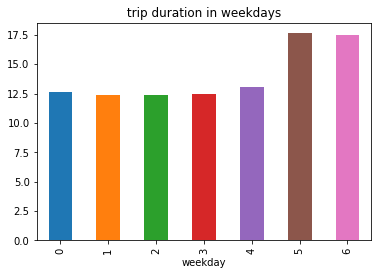

In [47]:
# This figure shows user tend to have longer trip during the weekends
df1['duration_min'].groupby(df1['weekday']).mean().plot.bar()
plt.title(' trip duration in weekdays ')

No handles with labels found to put in legend.


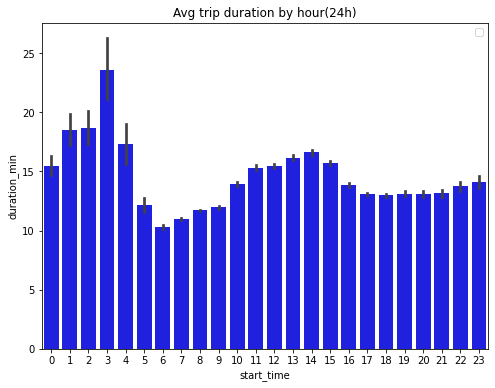

In [58]:
# the figure of trip duration by hours 
fig= plt.figure(figsize=(8,6))
sb.barplot(x=df1.index.hour, y="duration_min",data=df1, color = 'b')
plt.title('Avg trip duration by hour(24h)')
plt.legend(loc = 'upper right')

C:\Users\miaos1\Anaconda3\envs\py3\lib\site-packages\pandas\plotting\_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


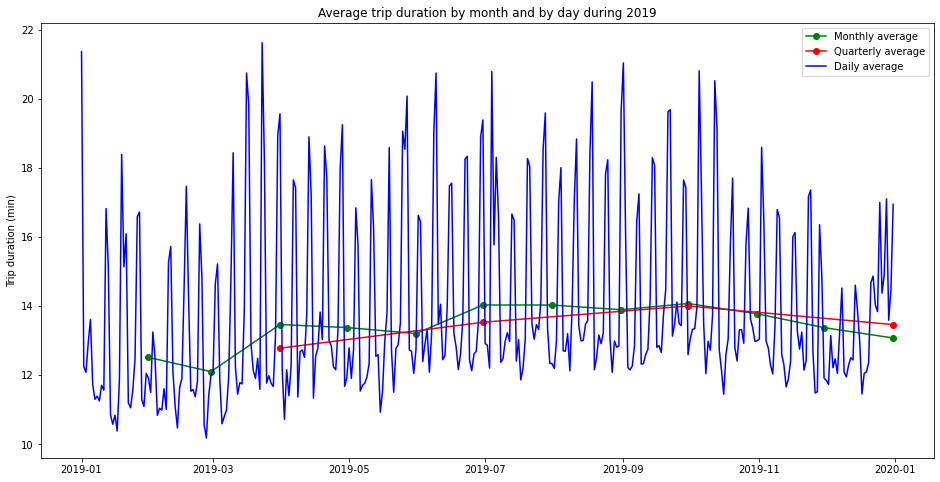

In [48]:
# this figure shows the daily, monthly, quarterly trip duration variation over 2019 
fig, ax = plt.subplots(figsize = [16,8])

plt.plot(df1['duration_min'].resample('M').mean(),'g-o', label = 'Monthly average')
plt.plot(df1['duration_min'].resample('Q').mean(),'r-o',label = 'Quarterly average')
plt.plot(df1['duration_min'].resample('D').mean(),'b',label = 'Daily average')
plt.title('Average trip duration by month and by day during 2019')
plt.ylabel('Trip duration (min)')
plt.xticks(rotation=0)
ax.legend(loc= 'upper right')
plt.show()


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 1. In the figure monthly usage with different user types in 2019, I noticed the number of subscribers and customers in dec are almost same, while in other months, the number of subscribers are many more than customer's number. This means less subscribers using the rental service in Dec, which might due to the christmas season.
> 2. In the weekday usage with different user types figure, the customer user count in weekdays and weekends is almost same, while subscriber tend to take more trips during weekdays. This might mean the subscriber tend to make more commuting trips during workdays.
> 3. The trip duration in weekdays figure shows user tend to have longer trip during the weekendsThis might due to longer bicycle trips for leisure during the weekends.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

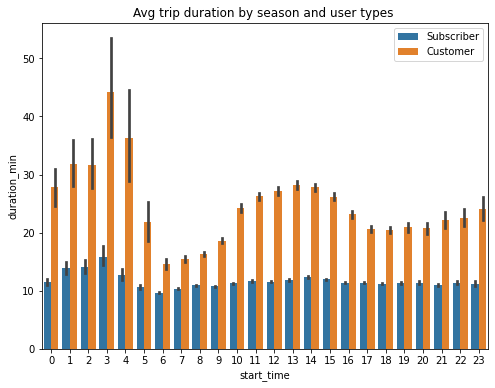

In [52]:
# the figure of trip duration by hours and user types shows the customer have longer trip over the year while subscribers tend to have shorter duration trip.
# This also shows the subscribers tend to taking roughly same-duration trips, which could due to the commuting reason.
# The highest rental duration is in morning time 4-5am.
fig= plt.figure(figsize=(8,6))
sb.barplot(x=df1.index.hour, y="duration_min", hue = 'user_type',data=df1)
plt.title('Avg trip duration by hour and user types ')
plt.legend(loc = 'upper right')
plt.xlabel('rental starting time(24h)')
plt.ylabel('Duration(min)')
#plt.xticks()

([<matplotlib.axis.XTick at 0x1622015ad30>,
 [Text(0, 0, 'Mon'),
  Text(0, 0, 'Tue'),
  Text(0, 0, 'Wed'),
  Text(0, 0, 'Thu'),
  Text(0, 0, 'Fri'),
  Text(0, 0, 'Sat'),
  Text(0, 0, 'Sun')])

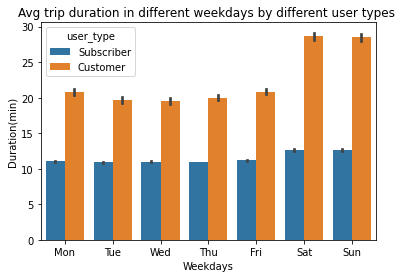

In [57]:
# The figure of trip duration in different weekdays by different user types shows the customers tend to have longer trips than the subscribers, easpecially during weekends.
sb.barplot(x="weekday", y="duration_min", hue = 'user_type',data=df1)
plt.title('Average trip duration in different weekdays by different user types ')
plt.xlabel('Weekdays')
plt.ylabel('Duration(min)')
plt.xticks([0,1,2,3,4,5,6], ['Mon','Tue','Wed','Thu', 'Fri','Sat', 'Sun'])

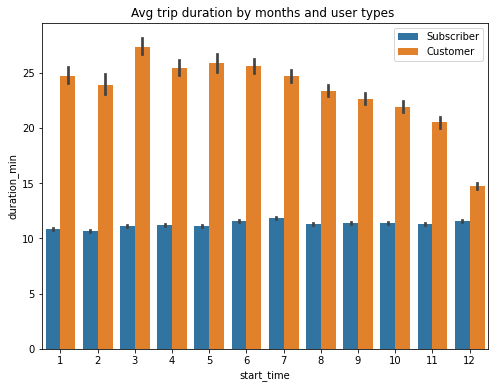

In [50]:
# the figure of trip duration by months and user types shows the customer have longer trip over the year while subscribers tend to have shorter duration trip.
# This also shows the subscribers tend to taking roughly same-duration trips, which could due to the commuting reason.
fig= plt.figure(figsize=(8,6))
sb.barplot(x=df1.index.month, y="duration_min", hue = 'user_type',data=df1)
plt.title('Avg trip duration by months and user types ')
plt.legend(loc = 'upper right')

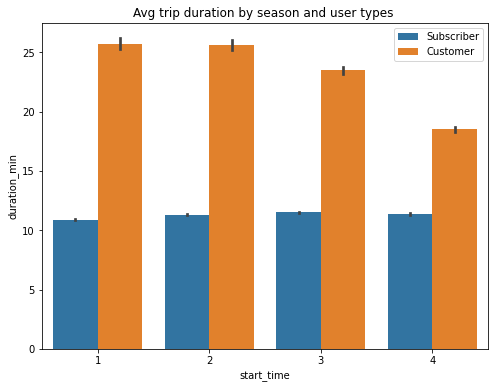

In [51]:
# the figure of trip duration by seasons and user types shows the customer have longer trip over the year while subscribers tend to have shorter duration trip.
# This also shows the subscribers tend to taking roughly same-duration trips, which could due to the commuting reason.
fig= plt.figure(figsize=(8,6))
sb.barplot(x=df1.index.quarter, y="duration_min", hue = 'user_type',data=df1)
plt.title('Avg trip duration by season and user types ')
plt.legend(loc = 'upper right')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> 1. The figure of trip duration in different weekdays by different user types shows the customers tend to have longer trips than the subscribers, easpecially during weekends.
> 2. the figure of trip duration by months and user types shows the customer have longer trip over the year while subscribers tend to have shorter duration trip. This also shows the subscribers tend to taking roughly same-duration trips, which could due to the commuting reason.

### Were there any interesting or surprising interactions between features?

> When group the trip duration data by the datetime and user type, we can notice certain user segment tend to have similar usage pattern. The custormers are more likely taking longer duration trips than subscriber. This could offer business insight for the company to better their operation stretagy.  

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!